# Upset plot for enhancers and silencers

In [1]:
import warnings
import polars as pl
import polars.selectors as cs
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
pl.Config.set_fmt_str_lengths(50)
sns.set_style(style='white')
warnings.filterwarnings('ignore')
from upsetplot import generate_counts, plot, UpSet

In [2]:
cd = "/data/cephfs-2/unmirrored/groups/kircher/MPRA/CaptureCMPRA/"
enhancers_file = cd + "results/motif_analysis/data/upregulating_OEs_noPLS.bed"
silencers_file = cd + "results/motif_analysis/data/downregulating_OEs_noPLS.bed"
DNAse_file = cd + "data/HepG2_DNase_ENCSR149XIL/ENCFF209DJG.bed.gz"
H3k4me1_file = cd + "data/HepG2_H3K4me1_ENCSR000APV/ENCFF428FAW.bed.gz"
ATAC_file = cd + "data/HepG2_ATAC_ENCSR042AWH/ENCFF913MQB.bed.gz"
H3k4me3_file = cd + "data/HepG2_H3K4me3_ENCSR575RRX/ENCFF982DUT.bed.gz"
H3k9me3_file = cd + "data/HepG2_H3K9me3_ENCSR000ATD/ENCFF533JQH.bed.gz"
H3k27ac_file = cd + "data/HepG2_H3K27ac_ENCSR000AMO/ENCFF392KDI.bed.gz"
H3k27me3_file = cd + "data/HepG2_H3K27me3_ENCSR000DUE/ENCFF982CSD.bed.gz"
Remap_file = cd + "data/HepG2_ReMAP_TF_ChIPSeq/remap2022_Hep-G2_4cols.bed.gz"
H3K9ac_file = cd + "data/HepG2_H3K9ac_ENCSR000AMD/ENCFF358CJW.bed.gz"
H3K79me2_file = cd + "data/HepG2_H3K79me2_ENCSR000AOM/ENCFF500KVU.bed.gz"
H3K4me2_file = cd + "data/HepG2_H3K4me2_ENCSR000AMC/ENCFF769MUQ.bed.gz"
H4K20me1_file = cd + "data/HepG2_H4K20me1_ENCSR000AMQ/ENCFF133PSF.bed.gz"
H2AFZ_file = cd + "data/HepG2_H2AFZ_ENCSR000AOK/ENCFF474NDN.bed.gz"
H3K36me3_file = cd + "data/HepG2_H3K36me3_ENCSR000DUD/ENCFF524PMT.bed.gz"
dir = cd + "results/manuscript_figures/upset_plot/"

In [3]:
count_dict = {}
count_dict[("up", "DNase")] = !bedtools intersect -a $enhancers_file -b $DNAse_file  -wa | wc -l 
count_dict[("down", "DNase")] = !bedtools intersect -a $silencers_file -b $DNAse_file  -wa | wc -l
count_dict[("up", "H3K4me1")] = !bedtools intersect -a $enhancers_file -b $H3k4me1_file  -wa | wc -l
count_dict[("down", "H3K4me1")] = !bedtools intersect -a $silencers_file -b $H3k4me1_file  -wa | wc -l
count_dict[("up", "ATAC")] = !bedtools intersect -a $enhancers_file -b $ATAC_file  -wa | wc -l
count_dict[("down", "ATAC")] = !bedtools intersect -a $silencers_file -b $ATAC_file  -wa | wc -l
count_dict[("up", "H3K4me3")] = !bedtools intersect -a $enhancers_file -b $H3k4me3_file  -wa | wc -l
count_dict[("down", "H3K4me3")] = !bedtools intersect -a $silencers_file -b $H3k4me3_file  -wa | wc -l
count_dict[("up", "H3K9me3")] = !bedtools intersect -a $enhancers_file -b $H3k9me3_file  -wa | wc -l
count_dict[("down", "H3K9me3")] = !bedtools intersect -a $silencers_file -b $H3k9me3_file  -wa | wc -l
count_dict[("up", "H3K27ac")] = !bedtools intersect -a $enhancers_file -b $H3k27ac_file  -wa | wc -l
count_dict[("down", "H3K27ac")] = !bedtools intersect -a $silencers_file -b $H3k27ac_file  -wa | wc -l
count_dict[("up", "H3K27me3")] = !bedtools intersect -a $enhancers_file -b $H3k27me3_file  -wa | wc -l
count_dict[("down", "H3K27me3")] = !bedtools intersect -a $silencers_file -b $H3k27me3_file  -wa | wc -l
count_dict[("up", "CTCF")] = !bedtools intersect -a $enhancers_file -b <(zcat $Remap_file | grep CTCF) -wa | wc -l
count_dict[("down", "CTCF")] = !bedtools intersect -a $silencers_file -b <(zcat $Remap_file | grep CTCF) -wa | wc -l
count_dict[("up", "RAD21")] = !bedtools intersect -a $enhancers_file -b <(zcat $Remap_file | grep RAD21) -wa | wc -l
count_dict[("down", "RAD21")] = !bedtools intersect -a $silencers_file -b <(zcat $Remap_file | grep RAD21) -wa | wc -l
count_dict[("up", "REST")] = !bedtools intersect -a $enhancers_file -b <(zcat $Remap_file | grep REST) -wa | wc -l
count_dict[("down", "REST")] = !bedtools intersect -a $silencers_file -b <(zcat $Remap_file | grep REST) -wa | wc -l
count_dict[("up", "H3K9ac")] = !bedtools intersect -a $enhancers_file -b $H3K9ac_file  -wa | wc -l
count_dict[("down", "H3K9ac")] = !bedtools intersect -a $silencers_file -b $H3K9ac_file  -wa | wc -l
count_dict[("up", "H3K79me2")] = !bedtools intersect -a $enhancers_file -b $H3K79me2_file  -wa | wc -l
count_dict[("down", "H3K79me2")] = !bedtools intersect -a $silencers_file -b $H3K79me2_file  -wa | wc -l
count_dict[("up", "H3K4me2")] = !bedtools intersect -a $enhancers_file -b $H3K4me2_file  -wa | wc -l
count_dict[("down", "H3K4me2")] = !bedtools intersect -a $silencers_file -b $H3K4me2_file  -wa | wc -l
count_dict[("up", "H4K20me1")] = !bedtools intersect -a $enhancers_file -b $H4K20me1_file  -wa | wc -l
count_dict[("down", "H4K20me1")] = !bedtools intersect -a $silencers_file -b $H4K20me1_file  -wa | wc -l
count_dict[("up", "H2AFZ")] = !bedtools intersect -a $enhancers_file -b $H2AFZ_file  -wa | wc -l
count_dict[("down", "H2AFZ")] = !bedtools intersect -a $silencers_file -b $H2AFZ_file  -wa | wc -l
count_dict[("up", "H3K36me3")] = !bedtools intersect -a $enhancers_file -b $H3K36me3_file  -wa | wc -l
count_dict[("down", "H3K36me3")] = !bedtools intersect -a $silencers_file -b $H3K36me3_file  -wa | wc -l

In [4]:
totals_dict = {}
totals_dict["up"] = !cat $enhancers_file | wc -l
totals_dict["down"] = !cat $silencers_file | wc -l 
totals_dict["DNase"] = !zcat $DNAse_file | wc -l
totals_dict["H3K4me1"] = !zcat $H3k4me1_file | wc -l
totals_dict["ATAC"] = !zcat $ATAC_file | wc -l
totals_dict["H3K4me3"] = !zcat $H3k4me3_file | wc -l
totals_dict["H3K9me3"] = !zcat $H3k9me3_file | wc -l
totals_dict["H3K27ac"] = !zcat $H3k27ac_file | wc -l
totals_dict["H3K27me3"] = !zcat $H3k27me3_file | wc -l
totals_dict["CTCF"] = !zcat $Remap_file | grep CTCF | wc -l
totals_dict["RAD21"] = !zcat $Remap_file | grep RAD21 | wc -l
totals_dict["REST"] = !zcat $Remap_file | grep REST | wc -l
totals_dict["H3K9ac"] = !zcat $H3K9ac_file | wc -l
totals_dict["H3K79me2"] = !zcat $H3K79me2_file | wc -l
totals_dict["H3K4me2"] = !zcat $H3K4me2_file | wc -l
totals_dict["H4K20me1"] = !zcat $H4K20me1_file | wc -l
totals_dict["H2AFZ"] = !zcat $H2AFZ_file | wc -l
totals_dict["H3K36me3"] = !zcat $H3K36me3_file | wc -l

In [5]:
count_dict = {k: int(v[0]) if isinstance(v, list) else v for k, v in count_dict.items()}
totals_dict = {k: int(v[0]) if isinstance(v, list) else v for k, v in totals_dict.items()}

In [6]:
# Initialize accumulators for all keys in totals_dict
accumulated_counts = {key: 0 for key in totals_dict.keys()}

# Accumulate counts from count_dict
for (dataset, feature), count in count_dict.items():
    if dataset in accumulated_counts:  # Check if the dataset exists in totals_dict
        accumulated_counts[dataset] += count
    if feature in accumulated_counts:  # Check if the feature exists in totals_dict
        accumulated_counts[feature] += count

# Subtract accumulated counts from totals_dict
for key in accumulated_counts:
    totals_dict[key] -= accumulated_counts[key]

# Print the updated totals_dict to verify
totals_dict

{'up': -243,
 'down': -347,
 'DNase': 178232,
 'H3K4me1': 157949,
 'ATAC': 216880,
 'H3K4me3': 34405,
 'H3K9me3': 172434,
 'H3K27ac': 50691,
 'H3K27me3': 65167,
 'CTCF': 78532,
 'RAD21': 70547,
 'REST': 27269,
 'H3K9ac': 45606,
 'H3K79me2': 91099,
 'H3K4me2': 93015,
 'H4K20me1': 40876,
 'H2AFZ': 27667,
 'H3K36me3': 152014}

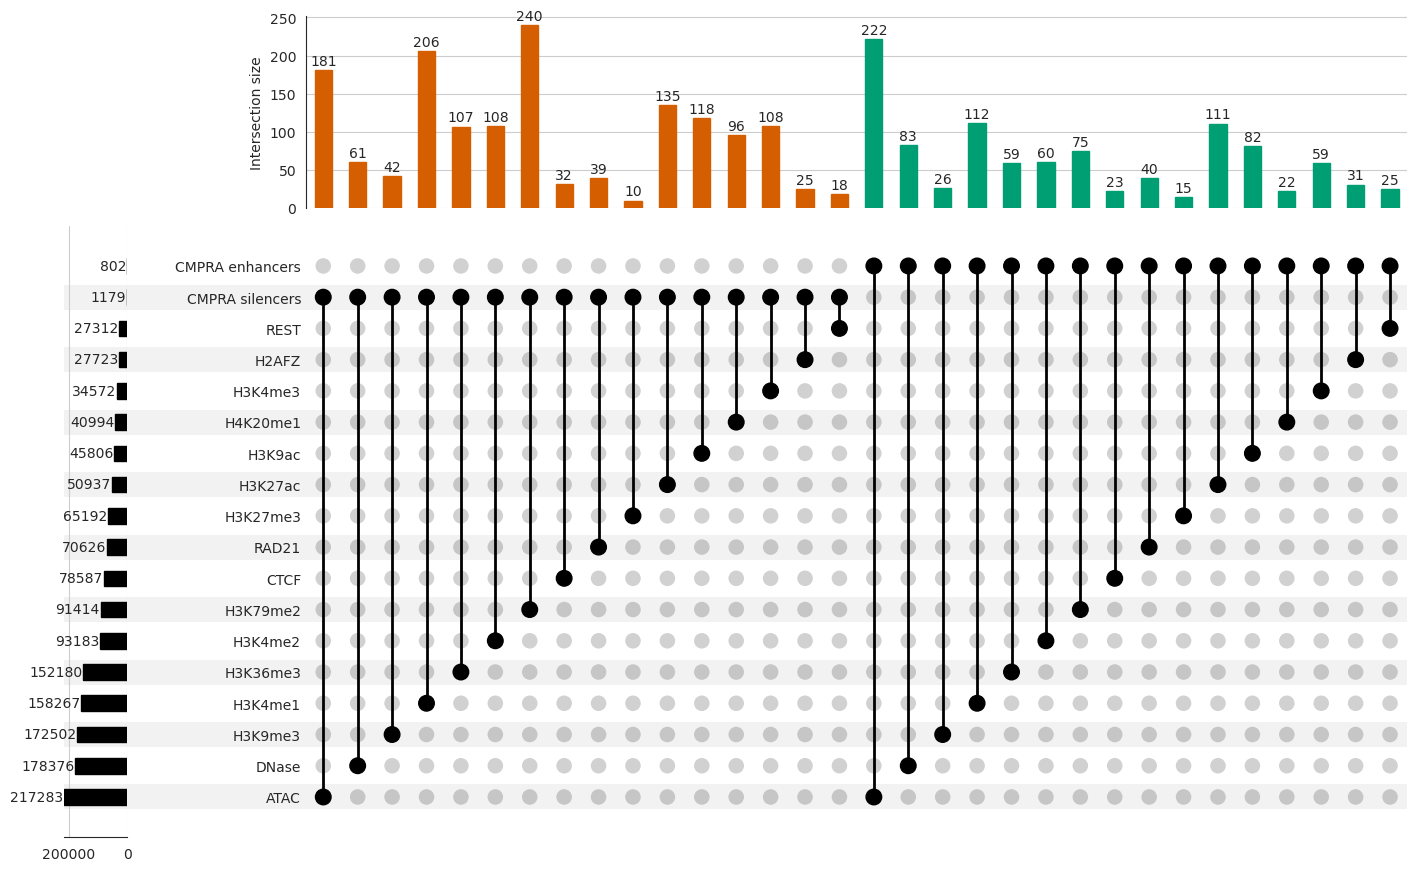

In [7]:
# Transform count_dict into the required format
data = []

# Add overlaps to the data
for (dataset, feature), count in count_dict.items():
    if dataset in ["up", "down"]:  # Only include valid dataset keys
        row = {
            "CMPRA enhancers": dataset == "up",
            "CMPRA silencers": dataset == "down",
            feature: True,
            "count": count  # Convert count to integer
        }
        data.append(row)

# Add totals to the data
totals = {
    "CMPRA enhancers": "up",
    "CMPRA silencers": "down",
    "DNase": "DNase",
    "H3K4me1": "H3K4me1",
    "ATAC": "ATAC",
    "H3K4me3": "H3K4me3",
    "H3K9me3": "H3K9me3",
    "H3K27ac": "H3K27ac",
    "H3K27me3": "H3K27me3",
    "CTCF": "CTCF",
    "RAD21": "RAD21",
    "REST": "REST",
    "H3K9ac": "H3K9ac",
    "H3K79me2": "H3K79me2",
	"H3K4me2": "H3K4me2",
	"H4K20me1": "H4K20me1",
	"H2AFZ": "H2AFZ",
	"H3K36me3": "H3K36me3"
}

for feature, total_key in totals.items():
    row = {key: False for key in totals.keys()}  # Initialize all features as False
    row[feature] = True  # Set the current feature to True
    row["count"] = totals_dict[total_key]  # Add the total count
    data.append(row)

# Fill missing features with False
df = pd.DataFrame(data).fillna(False)

# Set the index to the boolean columns and create the Series
index_columns = [col for col in df.columns if col != "count"]
series = df.set_index(index_columns)["count"]

# Create the upset plot
upset = UpSet(series, subset_size="sum", show_counts=True, min_degree=2)

# Customize the colors
fig = plt.figure(figsize=(10, 5))
upset.plot(fig=fig)

# Get the axes for the bars
bar_axes = [ax for ax in fig.axes if ax.get_ylabel() == "Intersection size"]

# Define muted colors for green and red
muted_red = "#D55E00"  # Muted reddish-orange
muted_green = "#009E73"  # Muted teal green

# Color the bars in the subset size histogram
for ax in bar_axes:
    for i, bar in enumerate(ax.patches):
        if i < 16:  # First 10 subsets (assumed to be "down")
            bar.set_color(muted_red)
        else:  # Last 10 subsets (assumed to be "up")
            bar.set_color(muted_green)


# Show the plot
plt.tight_layout()
plt.savefig(dir + "CRE_upset_plot.pdf", format="pdf")